In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data_path = './data/train.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# dropping id because it is only record identifier and add no value to data

data = data.drop(columns=['Id'], axis = 1)

In [6]:
target_col = 'SalePrice'

In [7]:
# getting numerical and categorical colums seprated
num_mapped_categorical_cols = ['OverallQual', 'OverallCond', 'MSSubClass']
def get_num_categorical_cols(df):
    numerical_cols = []
    categorical_cols = []
    

    for col in df.columns:
        dtype = df[col].dtype
        if col != target_col:
            if (dtype == int or dtype == float) and col not in num_mapped_categorical_cols :
                numerical_cols.append(col)
            else:
                categorical_cols.append(col)
    return numerical_cols, categorical_cols

numerical_cols, categorical_cols = get_num_categorical_cols(data)
print('Numerical Columns : ', numerical_cols)
print('Categoriacal Columns : ', categorical_cols)

Numerical Columns :  ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categoriacal Columns :  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

In [8]:
data[numerical_cols].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008


In [9]:
num_na_count = data[numerical_cols].isna().sum()
print(num_na_count[num_na_count>0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [10]:
data[num_na_count[num_na_count>0].index.values].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


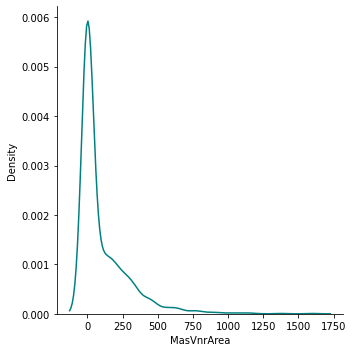

In [11]:
sns.displot(data['MasVnrArea'], color="teal", kind="kde")
plt.show()

In [12]:
# as we look into data MasVnrArea aprox 70-75% density lies b/w 0-250 so we can replace na with mean
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)

In [13]:
num_na_count = data[numerical_cols].isna().sum()
print(num_na_count[num_na_count>0])

LotFrontage    259
GarageYrBlt     81
dtype: int64


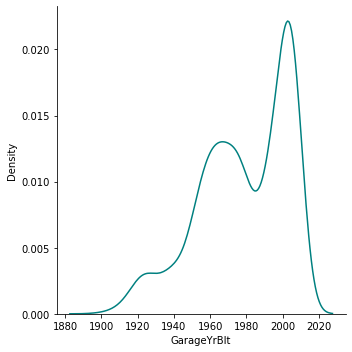

In [14]:
sns.displot(data['GarageYrBlt'], color="teal", kind="kde")
plt.show()

In [15]:
# as we look into data GarageYrBlt its years data so mean is not good option so I go with mode one
data['GarageYrBlt'].fillna(int(data['GarageYrBlt'].mode()), inplace=True)

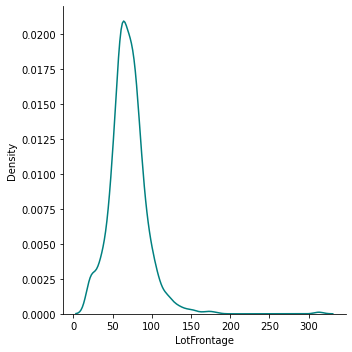

In [16]:
sns.displot(data['LotFrontage'], color="teal", kind="kde")
plt.show()

In [17]:
# as we look into data LotFrontage aprox 99% density lies b/w 0-150 (gausian ditribution) so we can replace na with mode onw
data['LotFrontage'].fillna(int(data['LotFrontage'].mode()), inplace=True)

In [18]:
data[num_na_count[num_na_count>0].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   GarageYrBlt  1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [19]:
num_na_count = data[numerical_cols].isna().sum()
print(num_na_count)

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [20]:
# now for categorical values as NA refer eiter no data avaialable or restricted one so decided to fill it with 'NA'
data[categorical_cols] = data[categorical_cols].fillna('NA')

In [21]:
# all missig values are filled now
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

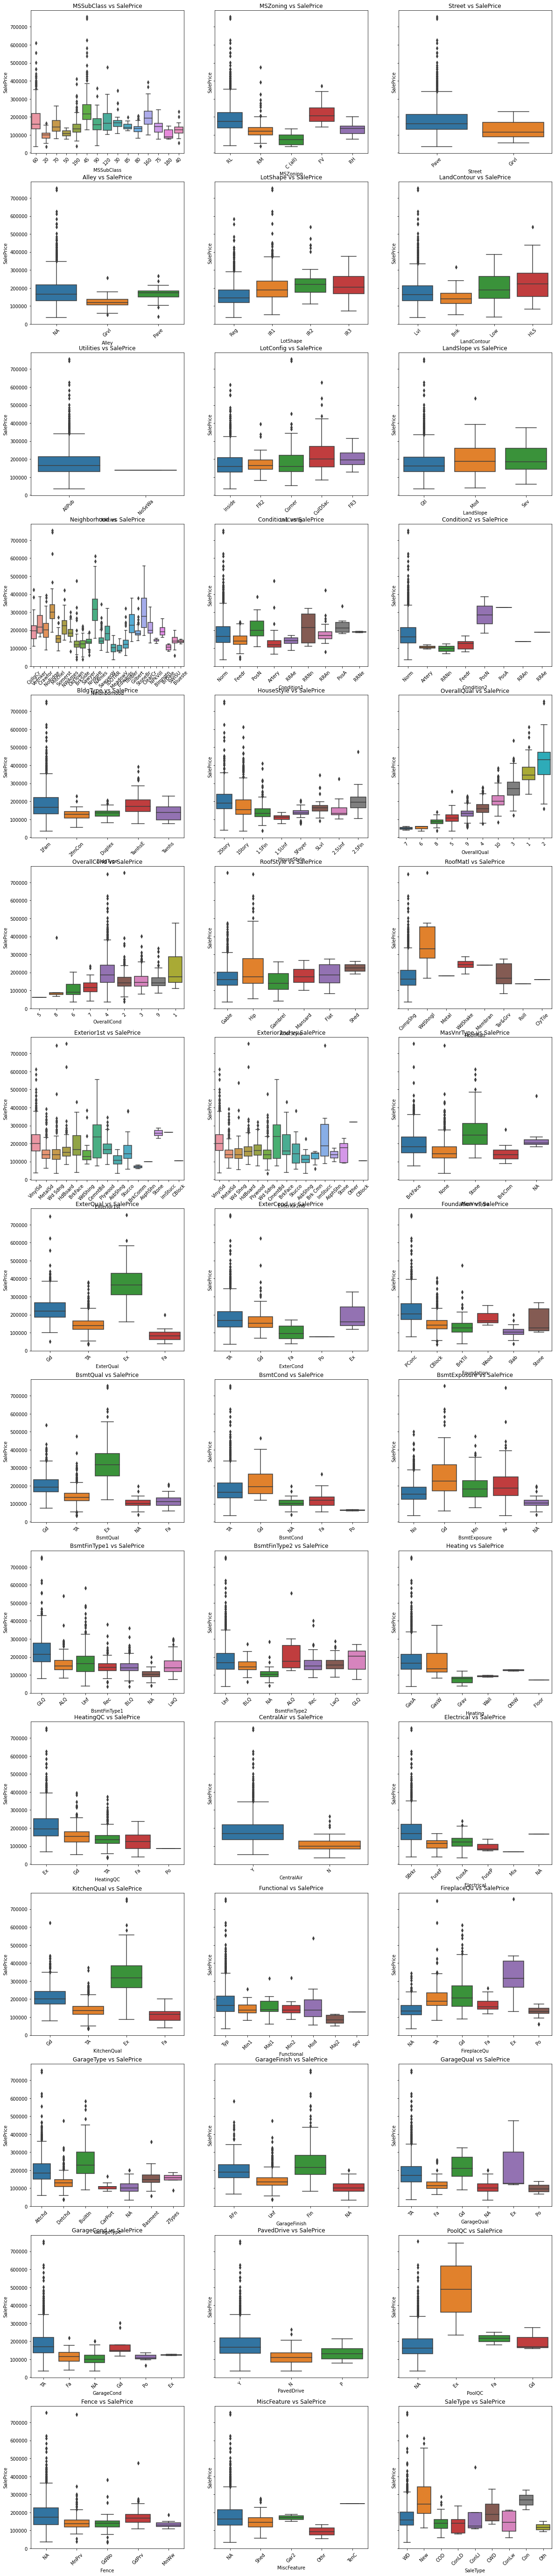

In [23]:
# plotting all categorrical coulums

fig, axes = plt.subplots(15, 3, sharey=True, figsize = (20, 100))

i = 0
for x in range(15):
    for y in range(3):
        col = categorical_cols[i]
        i+=1
        sns.boxplot(ax=axes[x, y], x=col, y=target_col, data = data)
        axes[x, y].set_title(F'{col} vs {target_col}')
        axes[x, y].set_xticklabels(data[col].unique(), rotation=45)

# General obervations 
- As looking into all the graphs found that few of categorical var have significatnt effect on price like PoolQC, KitechenQual, OverallQual etc.
- Some of then have not much efect so it will going to droped usinf RFE feature selection methdos like I think LotConfig , LandSlop etc... 

In [24]:
len(numerical_cols)

33

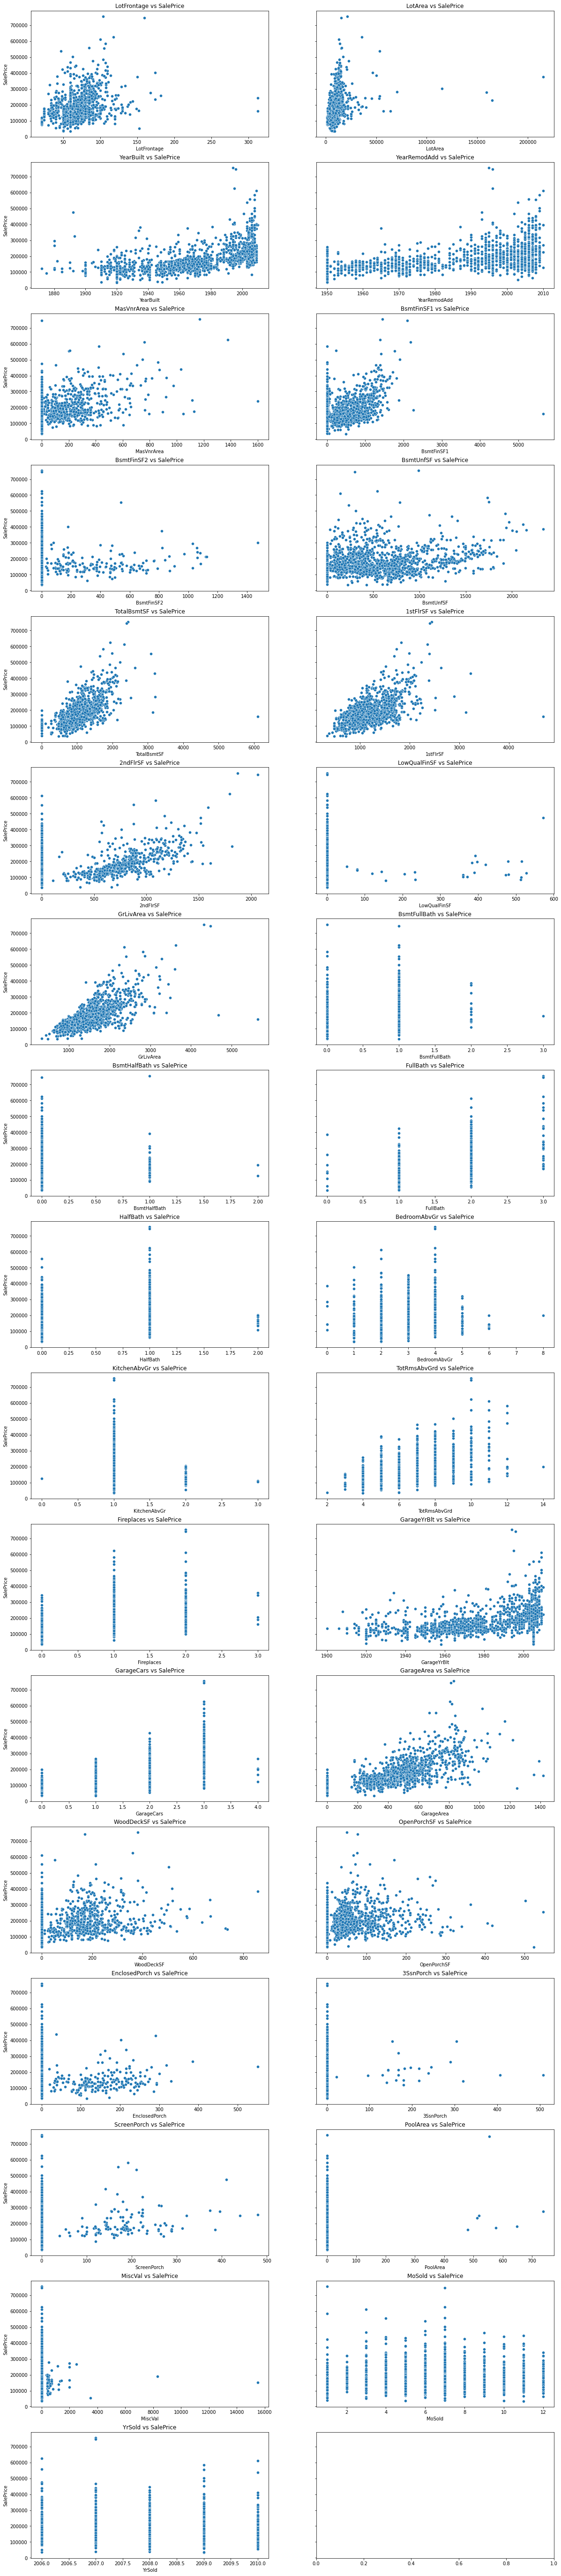

In [25]:
# plotting all numerical columns

fig, axes = plt.subplots(17, 2, sharey=True, figsize = (20, 100))

i = 0
for x in range(17):
    for y in range(2):
        col = numerical_cols[i]
        i+=1
        sns.scatterplot(ax=axes[x, y], x=col, y=target_col, data = data)
        axes[x, y].set_title(F'{col} vs {target_col}')
        if i == 33:
            break

In [26]:
# we can create one derived colum which help in geting more robust model is diffrence b/w build and sold year
data['YrDiff'] = data['YrSold'] - data['YearBuilt']

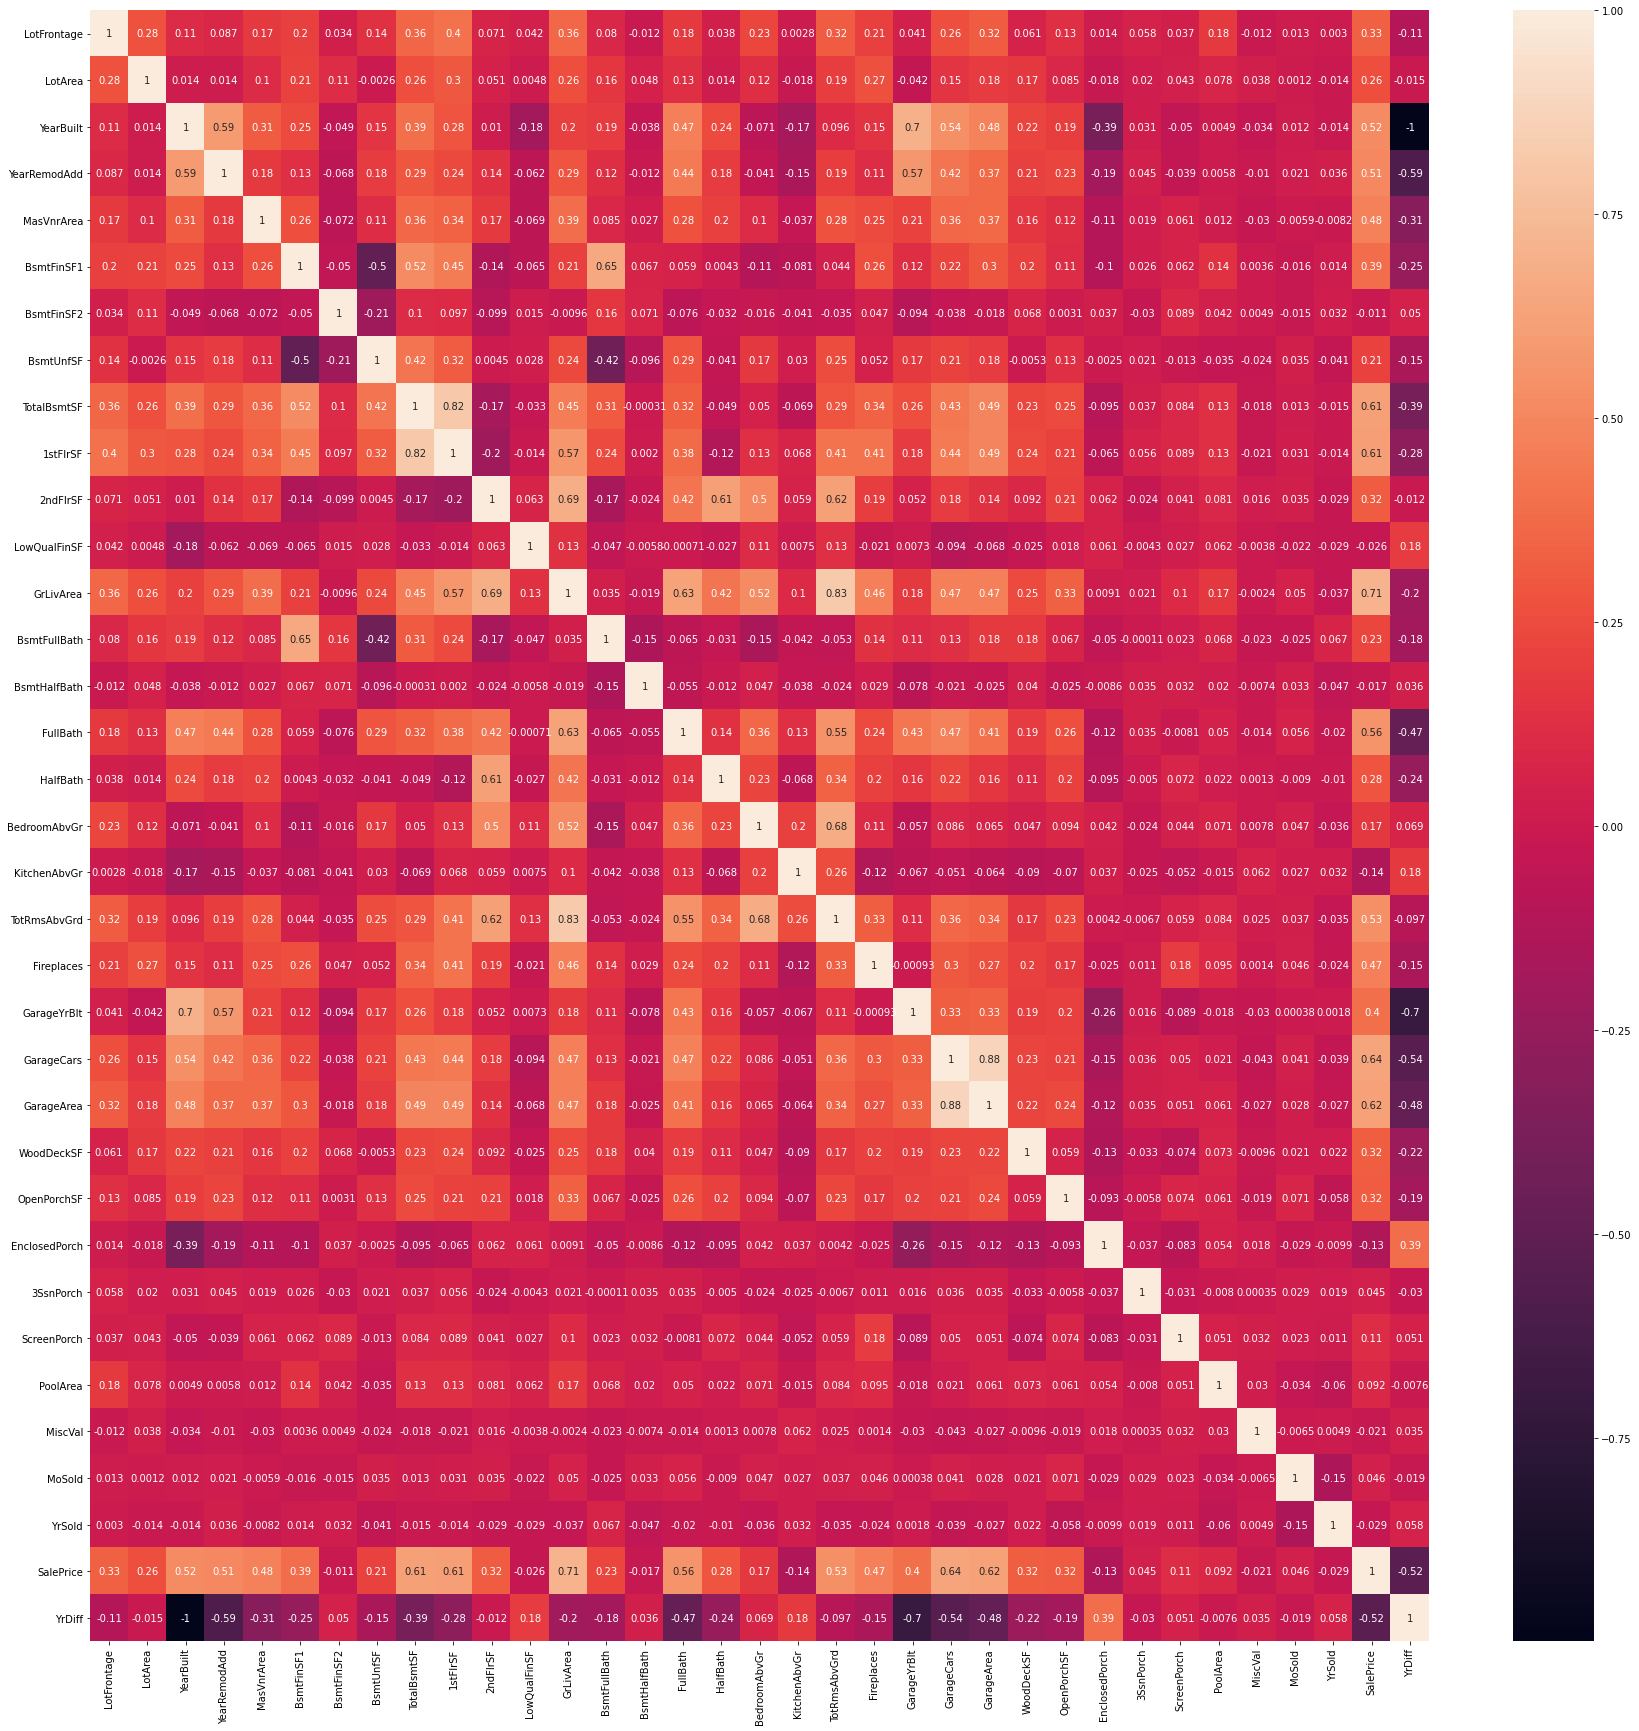

In [27]:
corr = data[numerical_cols+[target_col, 'YrDiff']].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

In [28]:
# as looking into corr plot YrDiff don't add any extra info so we decided to drop it
data.drop(columns=['YrDiff'], inplace=True)

In [29]:
# now creating dummy variables for categorical colums 

dummy_vars = pd.get_dummies(data[categorical_cols], drop_first=True)

In [30]:
dummy_vars.head()

,MSSubClass,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,60,7,5,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
3,70,7,5,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,60,8,5,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# creating new data frames for num and categorical columns
pre_processed_data = pd.concat([data[numerical_cols+[target_col]], dummy_vars], axis = 1)

In [32]:
pre_processed_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,0,0,0,1,0,0,0,1,0


## Start model bulding and feature selection

Setps -
- Devide data in train and test
- Scale data using min-max scaler
- Build LR model using sklearn
- Lookup in  r-squred score
- Lookup prediction vs residual plot
- After this move to Ridge and Lasso Regression model

#### Train Test Spliting

In [33]:
train, test = train_test_split(pre_processed_data, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(1168, 262) (292, 262)


#### Min-Max scaling

In [34]:
minMaxScaler = MinMaxScaler()
train[train.columns] = minMaxScaler.fit_transform(train)
test[test.columns] = minMaxScaler.transform(test)

<ipython-input-34-bf6ef9c9b522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train.columns] = minMaxScaler.fit_transform(train)
/Users/shubhams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-34-bf6ef9c9b522>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [35]:
train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.162404,0.043888,0.717143,0.581621,0.075306,0.079026,0.040064,0.244262,0.173776,0.191683,...,0.003425,0.003425,0.083048,0.001712,0.866438,0.003425,0.005993,0.015411,0.825342,0.083904
std,0.078154,0.050290,0.222286,0.345566,0.125244,0.081338,0.140388,0.191081,0.072124,0.088728,...,0.058445,0.058445,0.276073,0.041363,0.340326,0.058445,0.077216,0.123233,0.379837,0.277363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029387,0.586957,0.266667,0.000000,0.000000,0.000000,0.095248,0.130278,0.127123,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.143836,0.038795,0.724638,0.733333,0.000000,0.068125,0.000000,0.205479,0.163257,0.174621,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048611,0.934783,0.900000,0.120464,0.127746,0.000000,0.346854,0.212643,0.243862,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
x_train = train.drop(columns=[target_col], axis=1)
y_train = train[target_col]

x_test = test.drop(columns=[target_col], axis=1)
y_test= test[target_col]

#### LR model building

In [37]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [38]:
def print_scores(y_true, y_pred):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    rss = np.sum(np.square(y_true - y_pred))
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = mse ** 0.5
    print(F'R2 - {r2}\nRSS - {rss}\nMSE - {mse}\nRMSE - {rmse}')

In [39]:
y_train_pred = lr_model.predict(x_train)
print_scores(y_train, y_train_pred)

R2 - 0.9396336112629808
RSS - 0.8340204984118194
MSE - 0.0007140586459005303
RMSE - 0.02672187579307505


In [40]:
y_test_pred = lr_model.predict(x_test)
print_scores(y_test, y_test_pred)

R2 - -2.3806645938870678e+19
RSS - 1.0574403380837358e+20
MSE - 3.6213710208347117e+17
RMSE - 601778283.1603938


In [41]:
def plot_residual(y_true, y_pred, x  = None):
    y_res = y_true - y_pred
    plt.scatter(x = y_pred if x is None else x, y=y_res)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel('Prediction')
    plt.ylabel('Residual')
    plt.show()

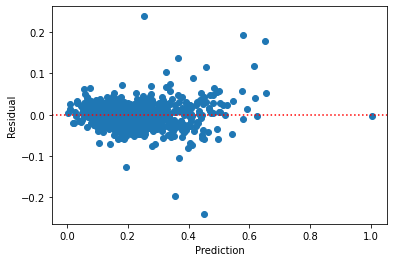

In [42]:
plot_residual(y_train, y_train_pred)

- it seems it randomly disributed allong x-axis so need to build Ridge and Lasso Regression insted of non-leniearity

#### Ridge

In [43]:
degree = 1
polyCoff = PolynomialFeatures(degree)
x_train_trans = polyCoff.fit_transform(x_train)

In [44]:
alphas = [
    0, 0.0001, 0.001, 0.01, 0.05, 
    0.1, 0.2,  0,3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
    1, 2, 3, 4, 5, 7, 8, 9,
    10, 20, 50, 75, 80, 85, 90, 95, 100, 200, 300, 500, 1000
]

params = {
    'alpha': alphas
}

model = Ridge()

folds = 10

model_cv = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=folds,
    error_score='neg_mean_absolute_error',
    return_train_score=True,
    verbose=1,
    n_jobs=2
)


model_cv.fit(x_train_trans, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:    3.9s finished


GridSearchCV(cv=10, error_score='neg_mean_absolute_error', estimator=Ridge(),
             n_jobs=2,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0, 3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   7, 8, 9, 10, 20, 50, 75, 80, 85, 90, ...]},
             return_train_score=True, verbose=1)

In [45]:
model_cv.best_params_

{'alpha': 9}

### Obervations 
- As we get 5 as best param value for  alpha, now we will lookup score for this on train and test data

In [65]:
model = Ridge(alpha=9)

model.fit(x_train_trans, y_train)

Ridge(alpha=9)

In [47]:
list(zip(train.columns, model.coef_))

[('LotFrontage', 0.0),
 ('LotArea', -0.0028030079800258636),
 ('YearBuilt', 0.020376696118675465),
 ('YearRemodAdd', 0.008444853579536424),
 ('MasVnrArea', 0.016072087227211866),
 ('BsmtFinSF1', 0.023547280076819985),
 ('BsmtFinSF2', 0.01873930448681524),
 ('BsmtUnfSF', 0.006442416389775982),
 ('TotalBsmtSF', 0.016629900355859286),
 ('1stFlrSF', 0.02485641326123562),
 ('2ndFlrSF', 0.04261456629223837),
 ('LowQualFinSF', 0.057024362484479806),
 ('GrLivArea', 0.009611993696621893),
 ('BsmtFullBath', 0.05820792178343841),
 ('BsmtHalfBath', 0.02578955405887834),
 ('FullBath', -0.004920393346980084),
 ('HalfBath', 0.04072755959651787),
 ('BedroomAbvGr', 0.017643996586806522),
 ('KitchenAbvGr', 0.011297865880758057),
 ('TotRmsAbvGrd', -0.011332753188927156),
 ('Fireplaces', 0.050142054487121654),
 ('GarageYrBlt', 0.025879471567005513),
 ('GarageCars', 0.0015018301799705094),
 ('GarageArea', 0.04382568513368118),
 ('WoodDeckSF', 0.03025117124888848),
 ('OpenPorchSF', 0.023543221475030414),
 (

In [48]:
y_train_pred = model.predict(x_train_trans)
x_test_trans = polyCoff.transform(x_test)
y_test_pred = model.predict(x_test_trans)

In [49]:
print_scores(y_true=y_train, y_pred=y_train_pred)
print_scores(y_true=y_test, y_pred=y_test_pred)

R2 - 0.8873706682301473
RSS - 1.556083996140682
MSE - 0.0013322636953259264
RMSE - 0.03650018760672233
R2 - 0.8600935660300532
RSS - 0.6214344818549791
MSE - 0.0021282002803252706
RMSE - 0.04613242114094242


- As we looking into we R2 score we have pretty good r2 scores or 88.7% for trainning and 87.6% for test

#### Lasso

In [50]:
alphas = [
    0, 0.00001, 0.00005, 0.0001, 0.0002, 0.0003,0.0004, 0.001, 0.01, 0.05, 
    0.1, 0.2,  0,3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
    1, 2, 3, 4, 5, 7, 8, 9,
    10, 20, 50, 75, 80, 85, 90, 95, 100, 200, 300, 500, 1000
]

params = {
    'alpha': alphas
}

model = Lasso()

folds = 10

model_cv = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=folds,
    error_score='neg_mean_absolute_error',
    return_train_score=True,
    verbose=1,
    n_jobs=2
)


model_cv.fit(x_train_trans, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 41 candidates, totalling 410 fits


[Parallel(n_jobs=2)]: Done 120 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 410 out of 410 | elapsed:    4.4s finished


GridSearchCV(cv=10, error_score='neg_mean_absolute_error', estimator=Lasso(),
             n_jobs=2,
             param_grid={'alpha': [0, 1e-05, 5e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.001, 0.01, 0.05, 0.1, 0.2, 0, 3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   7, 8, 9, 10, 20, ...]},
             return_train_score=True, verbose=1)

In [51]:
model_cv.best_params_

{'alpha': 0.0004}

### Obervations 
- As we get 0.0001 as best param value for  alpha, now we will lookup score for this on train and test data

In [52]:
model = Lasso(alpha=0.0004)

model.fit(x_train_trans, y_train)

Lasso(alpha=0.0004)

In [53]:
y_train_pred = model.predict(x_train_trans)
x_test_trans = polyCoff.transform(x_test)
y_test_pred = model.predict(x_test_trans)

In [54]:
print_scores(y_true=y_train, y_pred=y_train_pred)
print_scores(y_true=y_test, y_pred=y_test_pred)

R2 - 0.863176440307976
RSS - 1.8903508365548758
MSE - 0.001618451058694243
RMSE - 0.040229977115258754
R2 - 0.8560679348962429
RSS - 0.6393154750787506
MSE - 0.0021894365584888722
RMSE - 0.046791415435834725


### Obervations 
- As we looking into we R2 score we have pretty good r2 scores or 86.3% for trainning and 85.6% for test

In [55]:
list(zip(train.columns, model.coef_))

[('LotFrontage', 0.0),
 ('LotArea', -0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.01825506851234016),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.005969841478318328),
 ('GrLivArea', -0.0),
 ('BsmtFullBath', 0.24140256846278751),
 ('BsmtHalfBath', 0.030276488012190295),
 ('FullBath', 0.0),
 ('HalfBath', 0.023098461806700922),
 ('BedroomAbvGr', 0.005596919975579446),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.030557562218454695),
 ('GarageYrBlt', 0.018829057778861548),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0664768711813638),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.018543792807903962),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.007383497260305104),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('SalePrice', -0.0),
 ('MSSubClass', -0.041144288028391277),
 ('OverallQual', 0.1519503651

---
### Subjective ques/ans experimentaion
---

#### Ridge

In [56]:
model = Ridge(alpha=18)

model.fit(x_train_trans, y_train)

Ridge(alpha=18)

In [57]:
list(zip(train.columns, model.coef_))

[('LotFrontage', 0.0),
 ('LotArea', 0.002476653631927573),
 ('YearBuilt', 0.014068138114120284),
 ('YearRemodAdd', 0.006145605655266751),
 ('MasVnrArea', 0.01803963789952821),
 ('BsmtFinSF1', 0.02123724727007028),
 ('BsmtFinSF2', 0.015416475360295443),
 ('BsmtUnfSF', 0.005003575476678865),
 ('TotalBsmtSF', 0.016262437281014196),
 ('1stFlrSF', 0.02138112438366163),
 ('2ndFlrSF', 0.03382362419834112),
 ('LowQualFinSF', 0.04463252380441041),
 ('GrLivArea', 0.007043223692523202),
 ('BsmtFullBath', 0.045892660110135736),
 ('BsmtHalfBath', 0.021830996692445984),
 ('FullBath', -0.0046059359126922154),
 ('HalfBath', 0.03676242120101436),
 ('BedroomAbvGr', 0.017463462549252646),
 ('KitchenAbvGr', 0.01301872563407484),
 ('TotRmsAbvGrd', -0.006399939579472118),
 ('Fireplaces', 0.04351902922366978),
 ('GarageYrBlt', 0.022265649741164545),
 ('GarageCars', 0.004346870130307181),
 ('GarageArea', 0.038954407642166726),
 ('WoodDeckSF', 0.03023643143971679),
 ('OpenPorchSF', 0.020873728625103956),
 ('En

In [58]:
print(F'Most imp feature - {train.columns[np.argmax(np.abs(model.coef_))]}')

Most imp feature - OverallQual


In [59]:
y_train_pred = model.predict(x_train_trans)
x_test_trans = polyCoff.transform(x_test)
y_test_pred = model.predict(x_test_trans)

In [60]:
print_scores(y_true=y_train, y_pred=y_train_pred)
print_scores(y_true=y_test, y_pred=y_test_pred)

R2 - 0.8718025283936048
RSS - 1.7711730219623574
MSE - 0.0015164152585294157
RMSE - 0.0389411769022126
R2 - 0.8469857876033349
RSS - 0.6796564325097095
MSE - 0.0023275905222935257
RMSE - 0.04824510879139486


#### Lasso

In [61]:
model = Lasso(alpha=0.0008)

model.fit(x_train_trans, y_train)

Lasso(alpha=0.0008)

In [62]:
print(F'Most imp feature - {train.columns[np.argmax(np.abs(model.coef_))]}')

Most imp feature - BsmtFullBath


In [63]:
y_train_pred = model.predict(x_train_trans)
x_test_trans = polyCoff.transform(x_test)
y_test_pred = model.predict(x_test_trans)

In [64]:
print_scores(y_true=y_train, y_pred=y_train_pred)
print_scores(y_true=y_test, y_pred=y_test_pred)

R2 - 0.8368934667407174
RSS - 2.253475733917954
MSE - 0.0019293456626009878
RMSE - 0.043924317440354015
R2 - 0.8335356347235525
RSS - 0.7393991373199349
MSE - 0.002532188826438133
RMSE - 0.050320858760936636


#### Removing top 5 feature

In [66]:
list(zip(train.columns, model.coef_))

[('LotFrontage', 0.0),
 ('LotArea', -0.0028030079800258636),
 ('YearBuilt', 0.020376696118675465),
 ('YearRemodAdd', 0.008444853579536424),
 ('MasVnrArea', 0.016072087227211866),
 ('BsmtFinSF1', 0.023547280076819985),
 ('BsmtFinSF2', 0.01873930448681524),
 ('BsmtUnfSF', 0.006442416389775982),
 ('TotalBsmtSF', 0.016629900355859286),
 ('1stFlrSF', 0.02485641326123562),
 ('2ndFlrSF', 0.04261456629223837),
 ('LowQualFinSF', 0.057024362484479806),
 ('GrLivArea', 0.009611993696621893),
 ('BsmtFullBath', 0.05820792178343841),
 ('BsmtHalfBath', 0.02578955405887834),
 ('FullBath', -0.004920393346980084),
 ('HalfBath', 0.04072755959651787),
 ('BedroomAbvGr', 0.017643996586806522),
 ('KitchenAbvGr', 0.011297865880758057),
 ('TotRmsAbvGrd', -0.011332753188927156),
 ('Fireplaces', 0.050142054487121654),
 ('GarageYrBlt', 0.025879471567005513),
 ('GarageCars', 0.0015018301799705094),
 ('GarageArea', 0.04382568513368118),
 ('WoodDeckSF', 0.03025117124888848),
 ('OpenPorchSF', 0.023543221475030414),
 (

In [73]:
top_ind = np.argpartition(np.abs(model.coef_), -5)[-5:]

In [74]:
model.coef_[top_ind]

array([0.04712025, 0.05014205, 0.05702436, 0.05820792, 0.07261684])

In [83]:
train.columns[top_ind]

Index(['Neighborhood_NoRidge', 'Fireplaces', 'LowQualFinSF', 'BsmtFullBath',
       'OverallQual'],
      dtype='object')

In [102]:
new_cols = np.delete(train.columns, top_ind)
x_train_trans = train[new_cols]
x_test_trans = test[new_cols]

In [104]:
x_test_trans

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.167808,0.033252,0.659420,0.883333,0.000000,0.117470,0.0,0.169521,0.173322,0.168426,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1105,0.263699,0.051209,0.884058,0.750000,0.262700,0.182849,0.0,0.184503,0.239444,0.267554,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
413,0.119863,0.035804,0.398551,0.000000,0.000000,0.000000,0.0,0.431507,0.164975,0.159247,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
522,0.099315,0.017294,0.543478,0.000000,0.000000,0.070695,0.0,0.258990,0.164321,0.153740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1036,0.232877,0.054210,0.978261,0.966667,0.050798,0.181077,0.0,0.255993,0.265139,0.295089,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.099315,0.021618,0.471014,0.833333,0.315675,0.029766,0.0,0.316353,0.148445,0.182882,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1361,0.352740,0.069448,0.963768,0.916667,0.011611,0.225726,0.0,0.109589,0.250409,0.274438,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
802,0.143836,0.032247,0.963768,0.916667,0.000000,0.114812,0.0,0.034247,0.119149,0.090408,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
651,0.133562,0.036383,0.492754,0.000000,0.000000,0.000000,0.0,0.323202,0.123568,0.096604,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [93]:
model = Ridge(alpha=9)

model.fit(x_train_trans, y_train)

Ridge(alpha=9)

In [105]:
y_train_pred = model.predict(x_train_trans)
y_test_pred = model.predict(x_test_trans)

print_scores(y_true=y_train, y_pred=y_train_pred)
print_scores(y_true=y_test, y_pred=y_test_pred)

R2 - 0.9204128979881723
RSS - 1.0995733863793562
MSE - 0.0009414155705302707
RMSE - 0.03068249615872657
R2 - 0.8984901057402969
RSS - 0.4508852577572155
MSE - 0.0015441275950589571
RMSE - 0.0392953889796113


In [106]:
top_ind = np.argpartition(np.abs(model.coef_), -5)[-5:]


train.columns[top_ind]

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'MiscVal'], dtype='object')